## **About Dataset**

This [Kaggle](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting) dataset contains information about customers, shipping, inventory and sales of a global superstore in 2015-2018. Dataset is intended only for a training purpose.  In this notebook I tried to answer on the next set of questions:

1. What is overall sales trend?
2. What  is the sales figure for each states? And what is top 25 cities with the highest sales?
3. Who are our biggest clients ( by the amount of money spent)?
4. Which market segment contributed more into the sales ( in $, in number of order and in number of items ordered)?
5. Which shipping method is more popular among customers? 
6.  Which products are most profitable? (list of 15). Top 10 most expensive and most cheap products. 
7. What are the sales trends in each states?

The anlysis was performed in Azure Data Studio. So let import the data and explore it

In [7]:
SELECT TOP 10 *
FROM dbo.train

(10 rows affected)

Total execution time: 00:00:00.006

Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9599914550781
2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400024414062
3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.619999885559082
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775146484375
5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000030517578
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.86000061035156
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28000020980835
8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1519775390625
9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by Samsill,18.503999710083008
10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000015258789


,Dataset consist of total 9800 rows and 18 columns, data is easy to understand and the names of the columns are self-explonatory. During the process of importing the data, I found out that Postal\_Code column contains a NULL values, so let find these records.

In [7]:
SELECT * 
FROM dbo.train
WHERE
Postal_Code IS NULL

(11 rows affected)

Total execution time: 00:00:00.043

Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NULL,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.02999877929688
5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NULL,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.2000122070312
8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NULL,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NULL,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.9800033569336
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NULL,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.039999961853027
9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NULL,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.2900390625
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NULL,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.91999816894531
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NULL,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.279999732971191
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NULL,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.9400024414062
9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NULL,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.0399999618530273


There are 11 records with NULL values, all of them are from Burlington, Vermont. Burlington has 5 different zip codes so, unfortunately, without exact address  I can't update these fields. 

Let dig dipper and gather some additional info about dataset.

In [1]:
SELECT
COUNT(DISTINCT Order_ID) AS number_of_order,
COUNT(DISTINCT Customer_ID) AS total_customer,
COUNT(DISTINCT State) AS number_of_states,
COUNT(DISTINCT City) AS number_of_city,
COUNT(DISTINCT Postal_Code)AS  number_of_zipcode
FROM
dbo.train

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.155

number_of_order,total_customer,number_of_states,number_of_city,number_of_zipcode
4922,793,49,529,626


So, I find out that there were  almost 5000 orders in 4 years, around 800 customers from almost all over the US.  Run additional queries and and get more informations.

In [2]:
SELECT
Distinct Country
FROM dbo.train

SELECT
Distinct Category
FROM dbo.train

SELECT
Distinct Sub_Category
FROM dbo.train

SELECT
Distinct Ship_Mode
FROM dbo.train

SELECT
Distinct Region
FROM dbo.train

SELECT
Distinct Segment
FROM dbo.train

SELECT
avg(DATEDIFF(day, Order_Date, Ship_Date)) AS avg_fulfillment_time
FROM dbo.train

(1 row affected)

(3 rows affected)

(17 rows affected)

(4 rows affected)

(4 rows affected)

(3 rows affected)

(1 row affected)

Total execution time: 00:00:00.301

Country
United States


Category
Office Supplies
Furniture
Technology


Sub_Category
Supplies
Storage
Phones
Fasteners
Copiers
Chairs
Bookcases
Machines
Art
Envelopes


Ship_Mode
First Class
Same Day
Standard Class
Second Class


Region
East
South
West
Central


Segment
Corporate
Home Office
Consumer


avg_fulfillment_time
3


Summarizing our findings: there are 3 types of customers  (corporate, consumer and home office), from 4 regions of the USA.  This Office Supply Retailer offers 4 types of shipping options (same day, first, second and standard class) and average time to fullfill the order is 3 days.

### **Overall sales trend.**

Lets find out the sales for each year, month-by month sales and the average sales every month.  I rounded sales number to 2 decimals. Besides ability to run queries Azure Data Studio gives an opportunity to create a simple graphs and charts.

In [12]:
SELECT
YEAR(Order_Date) AS year,
round(sum(Sales), 2) AS year_sales_total
FROM dbo.train
GROUP BY YEAR(Order_Date)
ORDER BY year 

(4 rows affected)

Total execution time: 00:00:00.018

year,year_sales_total
2015,479856.21
2016,459436.01
2017,600192.55
2018,722052.02


In [13]:
SELECT
YEAR(Order_Date) AS year,
MONTH(Order_Date) AS month,
round(sum(Sales), 2) AS month_by_month_sales
FROM dbo.train
GROUP BY YEAR(Order_Date), MONTH(Order_Date)
ORDER BY year

(48 rows affected)

Total execution time: 00:00:00.023

year,month,month_by_month_sales
2015,1,14205.71
2015,2,4519.89
2015,3,55205.8
2015,4,27906.85
2015,5,23644.3
2015,6,34322.94
2015,7,33781.54
2015,8,27117.54
2015,9,81623.53
2015,10,31453.39


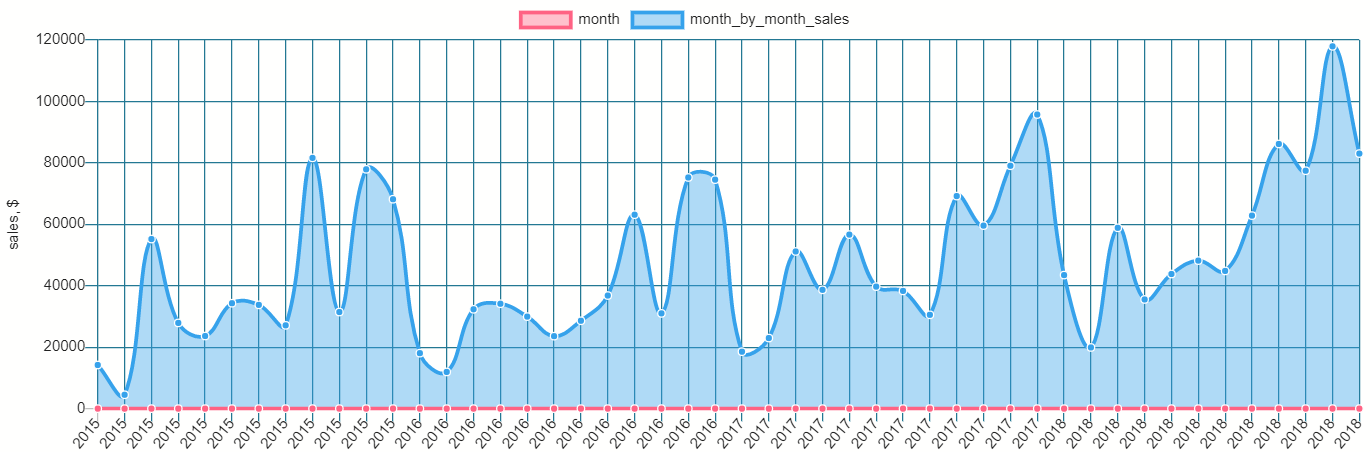


In [5]:
SELECT
MONTH(Order_Date) AS month,
avg(Sales) AS monthly_sales_avg
FROM dbo.train
GROUP BY MONTH(Order_Date)
ORDER BY month

(12 rows affected)

Total execution time: 00:00:00.067

month,monthly_sales_avg
1,257.62740175483003
2,199.90274553427392
3,290.5493936456302
4,207.43226817154994
5,212.53341094132128
6,211.05285528513525
7,208.80299663509496
8,227.0071087396162
9,221.64210646521394
10,246.59616048020692


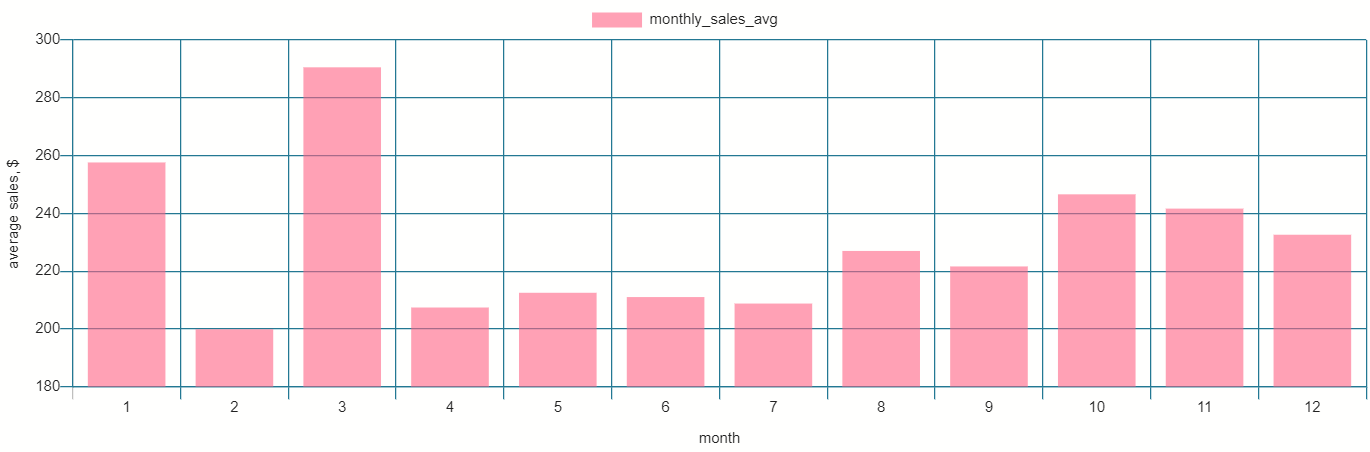

### **Sales figures for each states. Top 25 cities with the highest sales.**

In [1]:
SELECT
TOP 25 City,
round(sum(Sales), 2) as sales_by_city
FROM dbo.train
GROUP BY City
ORDER BY sales_by_city DESC


(25 rows affected)

Total execution time: 00:00:00.083

City,sales_by_city
New York City,252462.55
Los Angeles,173420.18
Seattle,116106.32
San Francisco,109041.12
Philadelphia,108841.75
Houston,63956.14
Chicago,47820.13
San Diego,47521.03
Jacksonville,44713.18
Detroit,42446.94


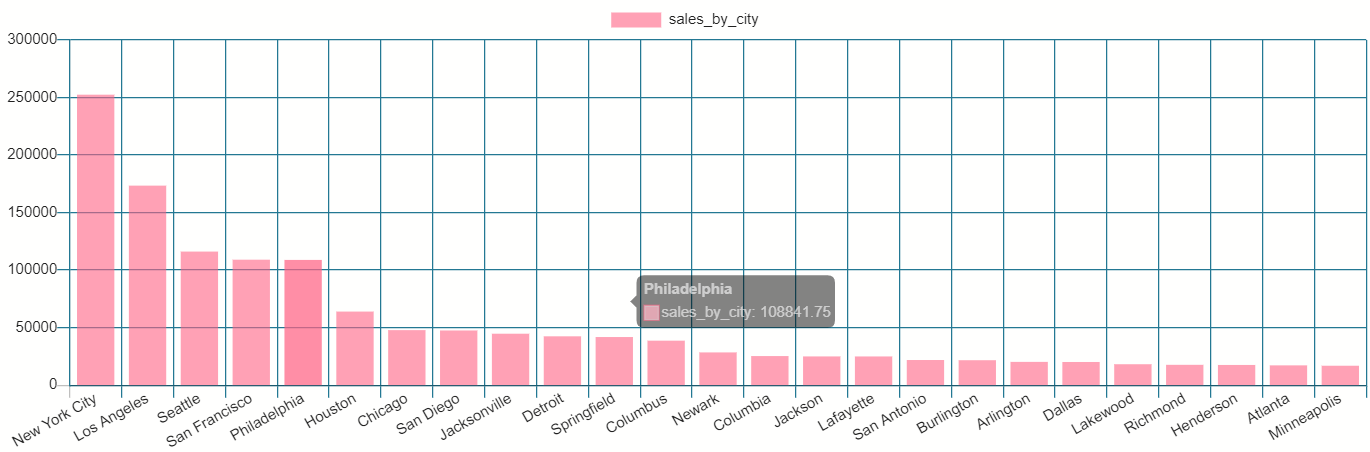

In [2]:
SELECT
State,
round(sum(Sales), 2) as sales_by_state
FROM dbo.train
GROUP BY State
ORDER BY sales_by_state DESC


(49 rows affected)

Total execution time: 00:00:00.024

State,sales_by_state
California,446306.46
New York,306361.15
Texas,168572.53
Washington,135206.85
Pennsylvania,116276.65
Florida,88436.53
Illinois,79236.52
Michigan,76136.07
Ohio,75130.35
Virginia,70636.72


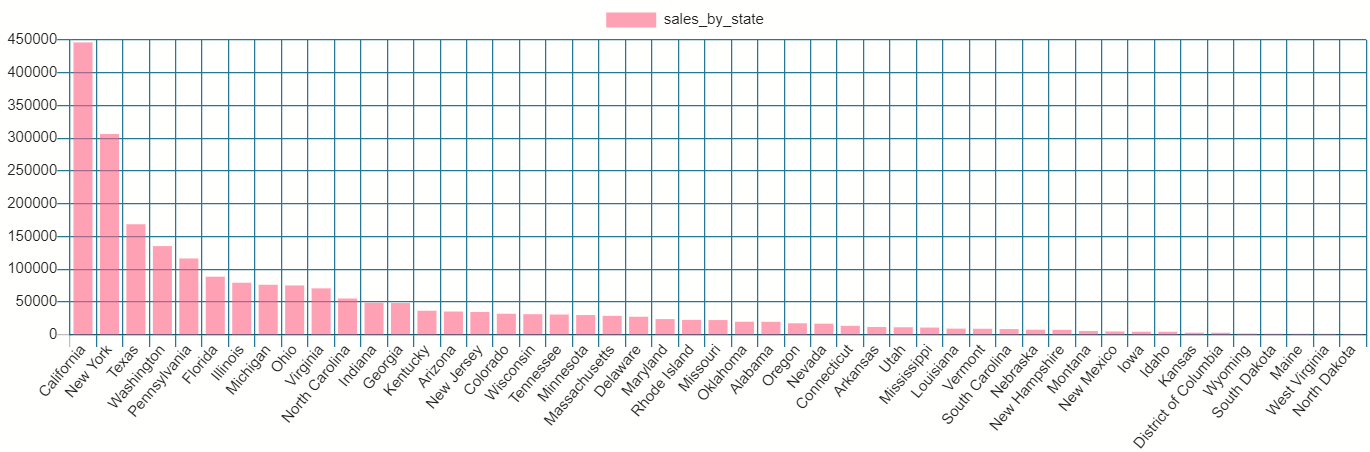

### **Biggest clients.**

The list of our top 15 clients is organized in descending order.

In [3]:
SELECT
TOP 15 Customer_Name,
round(sum(Sales), 2) AS sales_by_customers
FROM dbo.train
GROUP BY Customer_Name
ORDER BY sales_by_customers DESC

(15 rows affected)

Total execution time: 00:00:00.012

Customer_Name,sales_by_customers
Sean Miller,25043.05
Tamara Chand,19052.22
Raymond Buch,15117.34
Tom Ashbrook,14595.62
Adrian Barton,14473.57
Ken Lonsdale,14175.23
Sanjit Chand,14142.33
Hunter Lopez,12873.3
Sanjit Engle,12209.44
Christopher Conant,12129.07


### **Which customers (segment) contributed more into the sales?**

At first lets us find out  which market segment is responsoble for the highest sales.

In [1]:
SELECT
Segment,
round(sum(Sales), 2) sales_by_segment
FROM dbo.train
GROUP BY Segment
ORDER BY sales_by_segment


(3 rows affected)

Total execution time: 00:00:00.077

Segment,sales_by_segment
Home Office,424982.18
Corporate,688494.07
Consumer,1148060.53


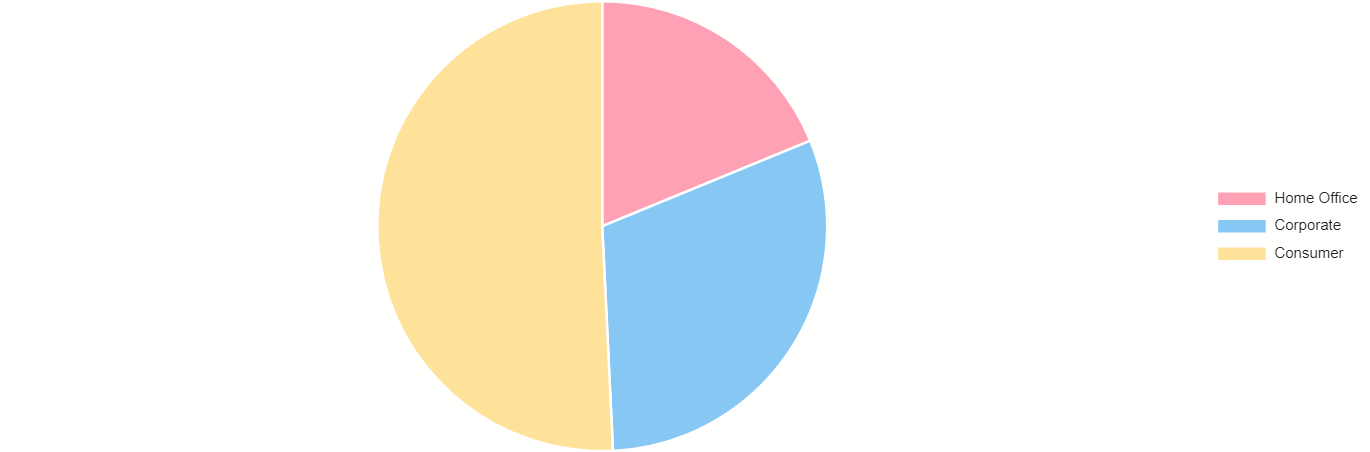

Next questions, how many orders were completed by each customers(market segment) and how many products did they ordered.

In [2]:
SELECT
COUNT(Distinct Order_ID) AS corporate_order_total,
COUNT(Product_Name) AS product_ordered_by_corporate,
round(sum(Sales), 2) AS corporate_sales_in_$,
CONCAT(round(sum(Sales) * 100 / (SELECT sum(Sales) FROM dbo.train), 2), '%') AS percentage_of_total_sales_$ -- counting percentage 
FROM dbo.train
WHERE 
Segment = 'Corporate'

SELECT
COUNT(Distinct Order_ID) AS home_office_total_order,
COUNT(Product_Name) AS product_ordered_by_home_office,
round(sum(Sales), 2) AS home_office_sale_in_$,
CONCAT(round(sum(Sales) * 100 / (SELECT sum(Sales) FROM dbo.train), 2), '%') AS percentage_of_total_sales_$
FROM dbo.train
WHERE 
Segment = 'Home Office'

SELECT
COUNT(Distinct Order_ID) AS consumer_order_total,
COUNT(Product_Name) AS product_ordered_by_consumer,
round(sum(Sales), 2) AS consumer_sales_in_$,
CONCAT(round(sum(Sales) * 100 / (SELECT sum(Sales) FROM dbo.train), 2), '%') AS percentage_of_total_sales_$
FROM dbo.train
WHERE 
Segment = 'Consumer'


(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.063

corporate_order_total,product_ordered_by_corporate,corporate_sales_in_$,percentage_of_total_sales_$
1491,2953,688494.07,30.44%


home_office_total_order,product_ordered_by_home_office,home_office_sale_in_$,percentage_of_total_sales_$
894,1746,424982.18,18.79%


consumer_order_total,product_ordered_by_consumer,consumer_sales_in_$,percentage_of_total_sales_$
2537,5101,1148060.53,50.76%


We can see from above that segment 'Consumer' contributed almost 51% in total sales (in $)  and bought more products then 'Home Office' and 'Corporate' combined.

### **Popular shipping method.**

In [3]:
SELECT
Ship_Mode,
COUNT(DISTINCT Order_ID) as sales_by_shipping_method
FROM dbo.train
GROUP BY Ship_Mode
ORDER BY sales_by_shipping_method


(4 rows affected)

Total execution time: 00:00:00.031

Ship_Mode,sales_by_shipping_method
Same Day,261
First Class,772
Second Class,944
Standard Class,2945


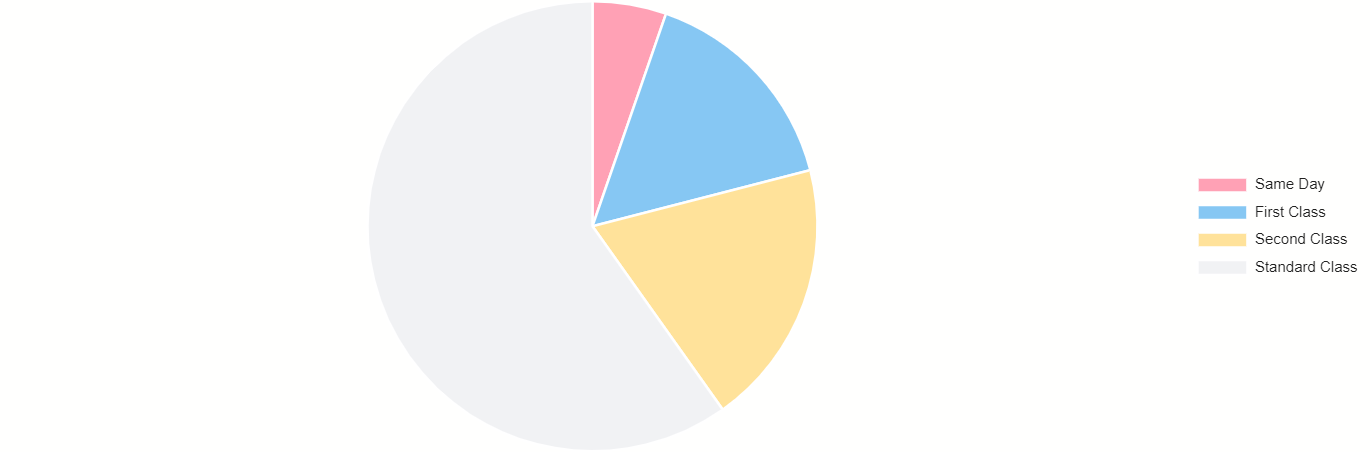

### **Most profitable products (list of 15).  Top 10 most expensive and cheapest products.**

In [4]:
SELECT
TOP 15 Product_Name,
round(sum(Sales), 2) AS sales_by_product
FROM dbo.train
GROUP BY Product_Name
ORDER BY sales_by_product DESC

(15 rows affected)

Total execution time: 00:00:00.034

Product_Name,sales_by_product
Canon imageCLASS 2200 Advanced Copier,61599.82
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48
HON 5400 Series Task Chairs for Big and Tall,21870.58
GBC DocuBind TL300 Electric Binding System,19823.48
GBC Ibimaster 500 Manual ProClick Binding System,19024.5
Hewlett Packard LaserJet 3310 Copier,18839.69
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.9
GBC DocuBind P400 Electric Binding System,17965.07
High Speed Automatic Electric Letter Opener,17030.31


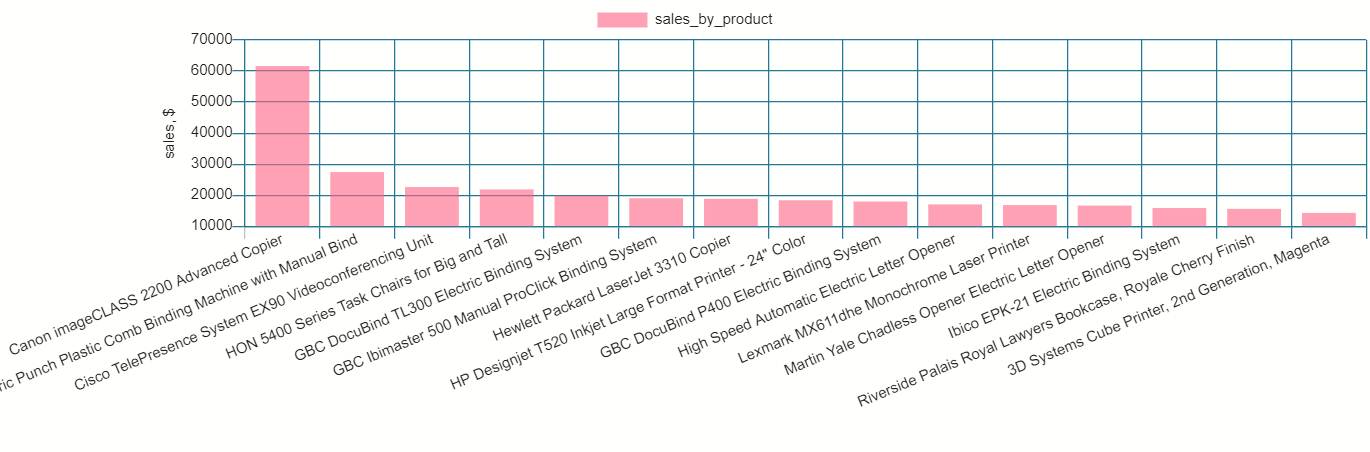

In [5]:
SELECT
DISTINCT TOP 10 Product_Name,
Sales
FROM dbo.train
ORDER BY Sales DESC


(10 rows affected)

Total execution time: 00:00:00.025

Product_Name,Sales
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48046875
Canon imageCLASS 2200 Advanced Copier,17499.94921875
Canon imageCLASS 2200 Advanced Copier,13999.9599609375
Canon imageCLASS 2200 Advanced Copier,11199.9677734375
Canon imageCLASS 2200 Advanced Copier,10499.9697265625
GBC Ibimaster 500 Manual ProClick Binding System,9892.740234375
Ibico EPK-21 Electric Binding System,9449.9501953125
"3D Systems Cube Printer, 2nd Generation, Magenta",9099.9296875
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",8749.9501953125
Canon imageCLASS 2200 Advanced Copier,8399.9755859375


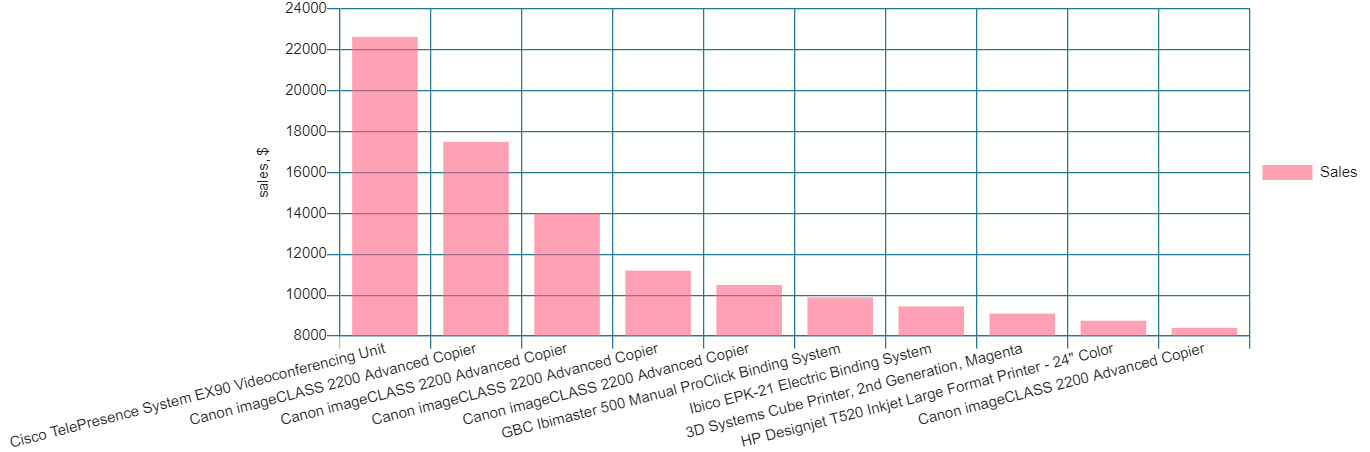

In [5]:
SELECT
DISTINCT TOP 10 Product_Name,
Sales
FROM dbo.train
ORDER BY Sales

(10 rows affected)

Total execution time: 00:00:00.019

Product_Name,Sales
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,0.4440000057220459
Acco Suede Grain Vinyl Round Ring Binder,0.5559999942779541
Avery Durable Slant Ring Binders With Label Holder,0.8360000252723694
Avery Round Ring Poly Binders,0.8519999980926514
Acco 3-Hole Punch,0.8759999871253967
Avery Non-Stick Binders,0.8980000019073486
"Avery Triangle Shaped Sheet Lifters, Black, 2/Pack",0.984000027179718
Maxell 4.7GB DVD-R 5/Pack,0.9900000095367432
Acco Economy Flexible Poly Round Ring Binder,1.0440000295639038
Wilson Jones Easy Flow II Sheet Lifters,1.0800000429153442


So, the most profitable item is _Canon imageCLASS 2200 Advanced Copier_ which brought  $61599,82  in sales. The most expensive product is _Cisco TelePresence System EX90 Videoconferencing Unit_ priced as $22638.48 and the cheapest item  is _Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum_ at $0.44 .

### **Sales trends in each states over the years.**

In [7]:
SELECT
State,
round(sum(Sales), 2) as sales_by_state,
YEAR(Order_Date) AS year
FROM dbo.train
GROUP BY State, YEAR(Order_Date)
ORDER BY State, year

(181 rows affected)

Total execution time: 00:00:00.017

State,sales_by_state,year
Alabama,6139.09,2015
Alabama,3891.97,2016
Alabama,7651.33,2017
Alabama,1828.25,2018
Arizona,8295.23,2015
Arizona,9611.21,2016
Arizona,6242.02,2017
Arizona,11124.19,2018
Arkansas,6302.69,2015
Arkansas,443.61,2016


### **Thanks for visiting my notebook!**